# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
#urls
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city


my_city = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat= []
Lng = []
Max_Temp = []
Wind_Speed = []

#counters
records = 1
sets = 1

# Loop through all the cities in our list
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    print("Processing Record %s of Set %s | %s" % (records, sets, city))
    
    try:
        response = requests.get(query_url).json()
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed']) 
       
        if records >= 49:
            records = 1
            sets += 1
            my_city.append(city)
        else:
            records += 1
            my_city.append(city)

    except:
        print("City not found. Skipping...")
        
print("(Data Retrieval Complete!!)---------------------")


Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | theologos
City not found. Skipping...
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tagusao
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nurota
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | suratgarh
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | kumluca
Processing Record 19 of Set 1 | opuwo
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | provideniya
Processing Record 2

Processing Record 24 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 24 of Set 4 | sao felix do xingu
Processing Record 25 of Set 4 | havre
Processing Record 26 of Set 4 | huilong
Processing Record 27 of Set 4 | talnakh
Processing Record 28 of Set 4 | ahipara
Processing Record 29 of Set 4 | thunder bay
Processing Record 30 of Set 4 | berezovyy
Processing Record 31 of Set 4 | lodwar
Processing Record 32 of Set 4 | samarai
Processing Record 33 of Set 4 | dangriga
Processing Record 34 of Set 4 | katakwi
Processing Record 35 of Set 4 | dingli
Processing Record 36 of Set 4 | yirol
City not found. Skipping...
Processing Record 36 of Set 4 | reinosa
Processing Record 37 of Set 4 | karpathos
Processing Record 38 of Set 4 | shaunavon
Processing Record 39 of Set 4 | kamaishi
Processing Record 40 of Set 4 | colborne
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | mulki
Processing Record 43 of Set 4 | kindu
Processing Record 44 of Set 4 | cockburn tow

Processing Record 42 of Set 7 | port blair
Processing Record 43 of Set 7 | gaurnadi
Processing Record 44 of Set 7 | lulea
Processing Record 45 of Set 7 | naze
Processing Record 46 of Set 7 | kungurtug
Processing Record 47 of Set 7 | lorengau
Processing Record 48 of Set 7 | igdir
Processing Record 49 of Set 7 | coihaique
Processing Record 1 of Set 8 | baruun-urt
Processing Record 2 of Set 8 | alvares machado
Processing Record 3 of Set 8 | tombouctou
Processing Record 4 of Set 8 | zhongshan
Processing Record 5 of Set 8 | tual
Processing Record 6 of Set 8 | lufkin
Processing Record 7 of Set 8 | sukhumi
Processing Record 8 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 8 of Set 8 | hovd
Processing Record 9 of Set 8 | sicamous
Processing Record 10 of Set 8 | upernavik
Processing Record 11 of Set 8 | rio gallegos
Processing Record 12 of Set 8 | luderitz
Processing Record 13 of Set 8 | lasa
Processing Record 14 of Set 8 | camacha
Processing Record 15 of Set 8 | ordu
Process

Processing Record 27 of Set 11 | aykhal
Processing Record 28 of Set 11 | christchurch
Processing Record 29 of Set 11 | muros
Processing Record 30 of Set 11 | fallon
Processing Record 31 of Set 11 | pundaguitan
Processing Record 32 of Set 11 | yarega
Processing Record 33 of Set 11 | nokaneng
Processing Record 34 of Set 11 | marawi
Processing Record 35 of Set 11 | palmerston north
Processing Record 36 of Set 11 | mindelo
Processing Record 37 of Set 11 | hami
Processing Record 38 of Set 11 | ahuimanu
Processing Record 39 of Set 11 | qaqortoq
Processing Record 40 of Set 11 | nouakchott
Processing Record 41 of Set 11 | ancud
Processing Record 42 of Set 11 | barbar
City not found. Skipping...
Processing Record 42 of Set 11 | sao jose da coroa grande
Processing Record 43 of Set 11 | tyshkivka
Processing Record 44 of Set 11 | maiduguri
Processing Record 45 of Set 11 | queanbeyan
Processing Record 46 of Set 11 | santo tomas
Processing Record 47 of Set 11 | sur
Processing Record 48 of Set 11 | d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
data = {"City": cities,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed}

data1 = pd.DataFrame.from_dict(data, orient='index')
data_df = data1.transpose()
data_df.dropna()
data_df
data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,castro,2,BR,1588875883,49,-24.79,-50.01,290.16,1.67
1,theologos,90,RE,1588875884,78,-21.36,55.77,298.15,2.6
2,saint-philippe,5,US,1588875884,13,42.6,-73.97,290.93,5.03
3,albany,87,PH,1588875884,78,9.19,117.81,300.54,2.16
4,tagusao,100,AR,1588875799,81,-54.8,-68.3,280.15,4.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature (F) vs. Latitude')

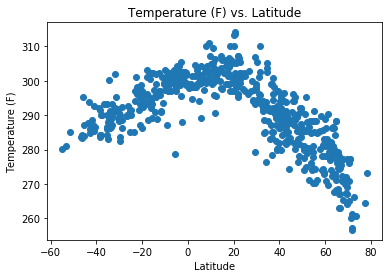

In [34]:
plt.scatter(data_df["Lat"],data_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

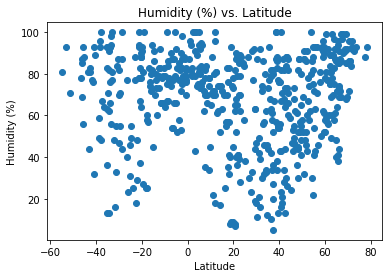

In [35]:
plt.scatter(data_df["Lat"],data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude')

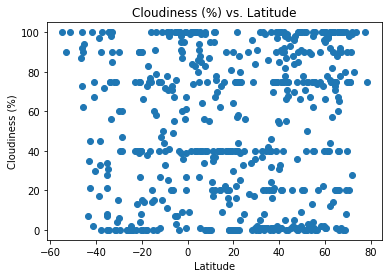

In [36]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude')

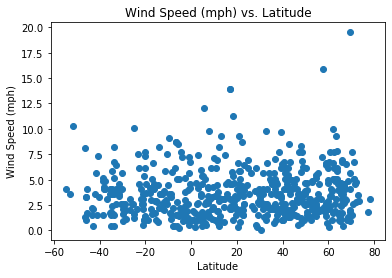

In [37]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")

## Linear Regression

In [6]:
# OPTIONAL: Create a function to create Linear Regression plots


In [7]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression